In [23]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [24]:
%sql ibm_db_sa://xsc80456:bgxwrc9rff-fw8jv@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB

'Connected: xsc80456@BLUDB'

In [38]:
import pandas
chicago_socioeconomic_data = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv');
%sql PERSIST chicago_socioeconomic_data ;

 * ibm_db_sa://xsc80456:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB


'Persisted chicago_socioeconomic_data'

In [39]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * ibm_db_sa://xsc80456:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [6]:
#Q1
%sql select count(*) from  chicago_socioeconomic_data;


 * ibm_db_sa://xsc80456:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


1
78


In [7]:
#Q2

%sql select count(*) from  chicago_socioeconomic_data where hardship_index > 50

 * ibm_db_sa://xsc80456:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


1
38


In [8]:
#Q3
indx=chicago_socioeconomic_data['hardship_index'].idxmax()

chicago_socioeconomic_data.at[indx,'hardship_index']


98.0

In [9]:
#Q3 alternative
%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data;

 * ibm_db_sa://xsc80456:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


1
98.0


In [10]:
#Q4
indx=chicago_socioeconomic_data['hardship_index'].idxmax()

chicago_socioeconomic_data.at[indx,'community_area_name']



'Riverdale'

In [11]:
#Q4 alternative
%sql select community_area_name from chicago_socioeconomic_data where (select max(hardship_index) from chicago_socioeconomic_data)= hardship_index



 * ibm_db_sa://xsc80456:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
Riverdale


In [12]:
#Q5
          
%sql select community_area_name from chicago_socioeconomic_data where per_capita_income_>60000;
          

          

 * ibm_db_sa://xsc80456:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


In [17]:
pandas.set_option("display.max_rows", 100)
income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
income_vs_hardship.DataFrame()


 * ibm_db_sa://xsc80456:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


,per_capita_income_,hardship_index
0,23939,39.0
1,23040,46.0
2,35787,20.0
3,37524,17.0
4,57123,6.0
5,60058,5.0
6,71551,2.0
7,88669,1.0
8,40959,8.0
9,32875,21.0


 * ibm_db_sa://xsc80456:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


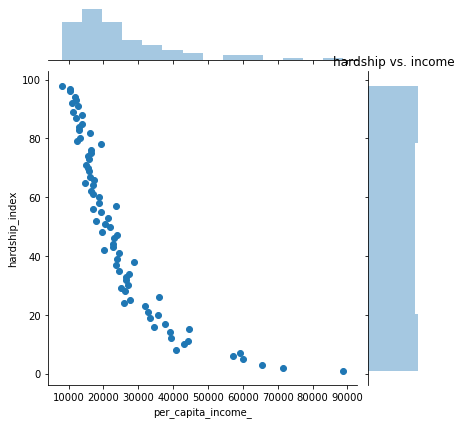

In [15]:
#Q6
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot =sns.jointplot(x='per_capita_income_', y='hardship_index', data=income_vs_hardship.DataFrame())

plt.title('hardship vs. income')
plt.show()

